In [2]:
from joblib import load
from sklearn.preprocessing import StandardScaler
import numpy as np

face_data = load("C:/Users/MaxB2/Documents/Machine_Is_Learning/olivetti_faces_400_64x64.joblib")
X = face_data["data"]
y = face_data["target"]

ss = StandardScaler()
X_s = ss.fit_transform(X)
"""
from sklearn.decomposition import PCA
pca = PCA(0.99)
X_99 = pca.fit_transform(X_std)
nbs =int(np.ceil(np.sqrt(np.shape(X_99[1]))))
pca_sqr = PCA(n_components=nbs**2)
X_s = pca_sqr.fit_transform(X)
"""

import numpy as np
print("Input: ",np.shape(X))
print("Output: ",np.shape(X_s))

Input:  (400, 4096)
Output:  (400, 4096)


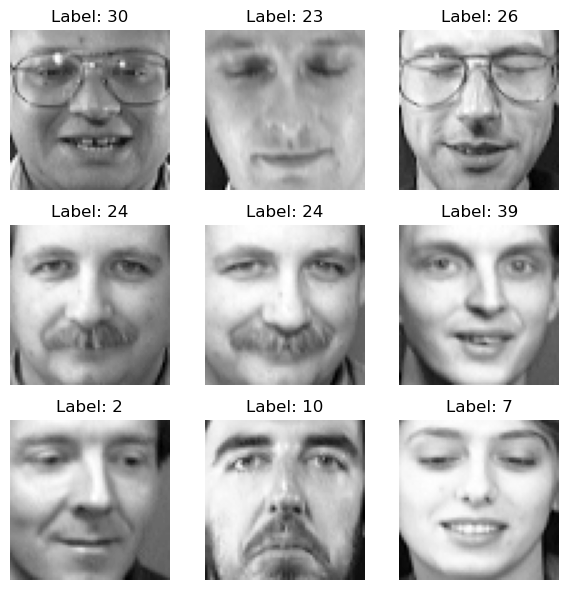

In [23]:
"""Number Demonstration"""
import matplotlib.pyplot as plt 
import random as rd
import numpy as np

indices = rd.sample(range(X.shape[0]), 9)  # Select 9 random indices

def plot_digits(indices, X, y):
    fig, axes = plt.subplots(3, 3, figsize=(6, 6))
    shapeX = int(np.sqrt(np.shape(X[1])[0]))

    for i, ax in enumerate(axes.flat):
        image_array = np.array(X[indices[i]])
        digit_array = image_array.reshape(shapeX, shapeX)
        negative_array = (-1) * digit_array  # Compute negative of the image
        #ax.imshow(negative_array, cmap="binary")
        ax.imshow(negative_array, cmap="binary")
        ax.axis("off")
        ax.set_title("Label: {}".format(y[indices[i]]))

    plt.tight_layout()
    plt.show()

plot_digits(indices, X, y)

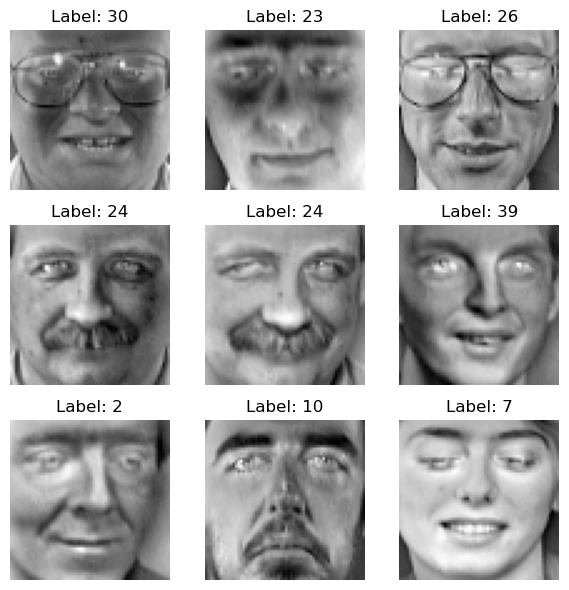

In [24]:
plot_digits(indices, X_s, y)

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

sss1 = StratifiedShuffleSplit(n_splits=10, test_size=(1/5))

for train_index, test_index in sss1.split(X,y):
    X_trainA = X_s[train_index]
    y_trainA = y[train_index]
    X_test = X_s[test_index]
    y_test = y[test_index]


sss2 = StratifiedShuffleSplit(n_splits=10, test_size=(1/4))

for train_index, val_index in sss2.split(X_trainA,y_trainA):
    X_train = X_trainA[train_index]
    y_train = y_trainA[train_index]
    X_val = X_trainA[val_index]
    y_val = y_trainA[val_index]

import pandas as pd

ydf = pd.Series(y)
yvdf = pd.Series(y_val)
ytrdf = pd.Series(y_train)
ytsdf = pd.Series(y_test)

# The proportions of the income_cat groups are defined as the following fractions
total_digit_counts = ydf.value_counts() / len(y)
strat_validation_value_counts = yvdf.value_counts()/ len(X_val)
train_set_value_counts = ytrdf.value_counts()/ len(X_train)
test_set_value_counts = ytsdf.value_counts()/ len(X_test)

# Convert the Series object to a DataFrame with appropriate column names
df_comparison = pd.DataFrame({
    "Normal Data Proportion": total_digit_counts.values,
    "Validation Set Proportion": strat_validation_value_counts.values,
    "Train Set Proportion":train_set_value_counts.values,
    "Test Set Proportion":test_set_value_counts.values
})
df_comparison

,Normal Data Proportion,Validation Set Proportion,Train Set Proportion,Test Set Proportion
0,0.025,0.025,0.025,0.025
1,0.025,0.025,0.025,0.025
2,0.025,0.025,0.025,0.025
3,0.025,0.025,0.025,0.025
4,0.025,0.025,0.025,0.025
5,0.025,0.025,0.025,0.025
6,0.025,0.025,0.025,0.025
7,0.025,0.025,0.025,0.025
8,0.025,0.025,0.025,0.025
9,0.025,0.025,0.025,0.025


In [25]:
import multiprocessing
num_processes = multiprocessing.cpu_count()
import keras

nnm = keras.models.Sequential([
    # keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(4096,activation="relu"),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(40,activation="softmax"),
])

nnm.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history = nnm.fit(X_train,y_train,epochs=200,batch_size=32,validation_data=(X_val,y_val))

Epoch 1/200
8/8 [==============================] - 1s 94ms/step - loss: 4.2205 - accuracy: 0.2167 - val_loss: 3.2644 - val_accuracy: 0.3875
Epoch 2/200
8/8 [==============================] - 1s 84ms/step - loss: 1.3555 - accuracy: 0.6333 - val_loss: 1.8080 - val_accuracy: 0.6000
Epoch 3/200
8/8 [==============================] - 1s 73ms/step - loss: 0.5686 - accuracy: 0.8500 - val_loss: 1.5980 - val_accuracy: 0.6875
Epoch 4/200
8/8 [==============================] - 1s 85ms/step - loss: 0.3296 - accuracy: 0.9125 - val_loss: 1.3047 - val_accuracy: 0.7875
Epoch 5/200
8/8 [==============================] - 1s 79ms/step - loss: 0.0875 - accuracy: 0.9750 - val_loss: 1.3754 - val_accuracy: 0.7625
Epoch 6/200
8/8 [==============================] - 1s 80ms/step - loss: 0.1141 - accuracy: 0.9625 - val_loss: 1.6569 - val_accuracy: 0.7125
Epoch 7/200
8/8 [==============================] - 1s 73ms/step - loss: 0.0669 - accuracy: 0.9667 - val_loss: 1.4156 - val_accuracy: 0.7500
Epoch 8/200
8/8 [===

KeyboardInterrupt: 

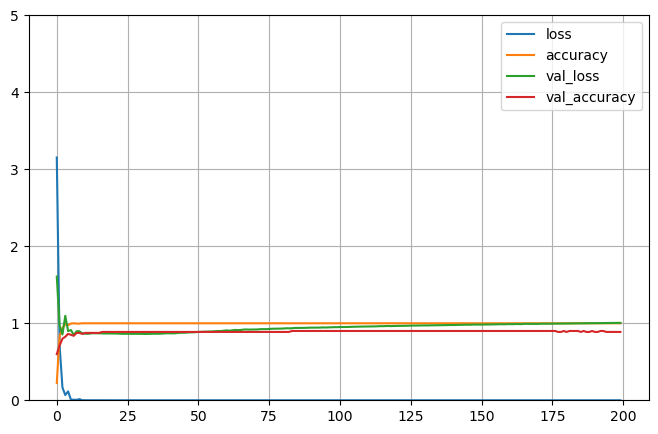

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,5)
plt.show()